https://python.langchain.com/docs/integrations/tools/
-- Different Lanchain Tools

In [ ]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities  import WikipediaAPIWrapper

api_wrapper = WikipediaAPIWrapper(top_k_results=5, doc_content_chars_max=500)
wikipedia_tool = WikipediaQueryRun(api_wrapper=api_wrapper)
def run_wikipedia_query(query: str) -> str:
    """Run a query against Wikipedia and return the result."""
    result = wikipedia_tool.run(query)
    return result



In [ ]:
wikipedia_tool.run({"query":"elon musk"})

In [ ]:
!pip install youtube_search

In [11]:
from langchain_community.tools import YouTubeSearchTool
tool=YouTubeSearchTool()
tool.run("sunny savita")


"['https://www.youtube.com/watch?v=oFMixPMJ6Ko&pp=ygUMc3Vubnkgc2F2aXRh0gcJCd4JAYcqIYzv', 'https://www.youtube.com/watch?v=_V3zqVlCACQ&pp=ygUMc3Vubnkgc2F2aXRh']"

In [14]:
from langchain_community.tools.tavily_search import TavilySearchResults
TavilySearchResults=TavilySearchResults(
    tavily_api_key="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")

In [15]:
TavilySearchResults.invoke("What happend in the RCB vicotery in IPL 2025?")

[{'title': 'RCB wins IPL 2025: Understanding the powerful Sanskrit phrase ...',
  'url': 'https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/rcb-wins-ipl-2025-understanding-the-powerful-sanskrit-phrase-engraved-on-the-ipl-trophy/articleshow/121689644.cms',
  'content': 'Royal Challengers Bengaluru (RCB) won their first-ever IPL title by beating Punjab Kings (PBKS) by 6 runs in the 2025 final at Ahmedabad\'s Narendra Modi Stadium. In a battle between two teams that had never won the IPL, it was Rajat Patidar\'s RCB that kept their cool to defend a target of 191 on a demanding pitch.The win also saw a long-awaited victory for Virat Kohli, whose unwavering quest for the IPL title had finally been realised. Earlier in the season, RCB had become the first team in IPL [...] In 2025, the Royal Challengers Bangalore (RCB) ended their long drought and won their inaugural IPL title, becoming the 8th title-winning team after 18 long years. However, as the camera panned over the tr

In [23]:
from langchain.agents import tool
@tool
def multiply(a:int,b:int) -> int:
    """Multiply two numbers."""
    return a * b

multiply.run({"a":2, "b":3})

6

In [25]:
multiply.invoke({"a": 2, "b": 3})


6

In [28]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [54]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    return input2 + "and second function"

def function3(input3):
    return input3 + "hello third function"


In [32]:
function1("satish")

'satish first function'

In [6]:
from langgraph.graph import Graph
workflow = Graph()
workflow.add_node("fun1", function1)
workflow.add_node("fun2", function2)
workflow.add_node("fun3", function3)
workflow.add_edge("fun1", "fun2")
workflow.add_edge("fun2", "fun3")


NameError: name 'function1' is not defined

In [60]:
workflow.set_entry_point("fun1")

workflow.set_finish_point("fun3")
app=workflow.compile()

In [5]:
from IPython.display import display, Image

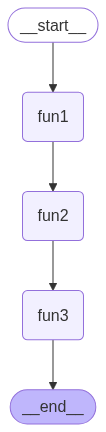

In [61]:
display(Image(app.get_graph().draw_mermaid_png()))


In [62]:
app.invoke("this is teja")

'this is tejafrom first functionand second functionhello third function'

In [63]:
for output in app.stream("this is teja"):
    for key, value in output.items():
        print(f"{key}: {value}")

fun1: this is tejafrom first function
fun2: this is tejafrom first functionand second function
fun3: this is tejafrom first functionand second functionhello third function


In [13]:
from langchain_google_genai import ChatGoogleGenerativeAI
model= ChatGoogleGenerativeAI(model="gemini-1.5-flash")
model.invoke("Tell me about the IPL 2025")

AIMessage(content="The IPL 2025 has not yet been officially announced or scheduled.  Information regarding teams, venues, dates, and even the format are purely speculative at this point.  The Board of Control for Cricket in India (BCCI) typically announces details for the following year's IPL several months in advance.  \n\nTo find out about IPL 2025, you will need to wait for official announcements from the BCCI, likely sometime in late 2024 or early 2025.  Keep an eye on their official website and reputable sports news sources for updates.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--9ddcd584-d502-432d-94ac-4970c1b0fea6-0', usage_metadata={'input_tokens': 10, 'output_tokens': 124, 'total_tokens': 134, 'input_token_details': {'cache_read': 0}})

In [12]:
from langgraph.graph import Graph
def llm(input_text: str) -> str:
    from langchain_google_genai import ChatGoogleGenerativeAI
    model= ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    output= model.invoke(input_text)
    return output.content
def token_counter(input_text: str) -> int:
    input_tokens = len(input_text.split())
    return f"Input tokens: {input_tokens}"

workflow2=Graph()
workflow2.add_node("llm", llm)
workflow2.add_node("token_counter", token_counter)
workflow2.add_edge("llm", "token_counter")
workflow2.set_entry_point("llm")    
workflow2.set_finish_point("token_counter")
app2 = workflow2.compile()
app2.invoke("What is the capital of India?")

for output in app2.stream("tell me aout the IPL 2025"):
    for key, value in output.items():
        print(f"{key}: {value}")

llm: The IPL 2025 is still far off, and details are not yet available.  Official announcements regarding venues, teams, player auctions, and the schedule are typically made closer to the event.  

However, we can anticipate some things:

* **Ten Teams:**  The IPL will likely continue with its current ten teams.
* **Similar Format:** The format will probably remain largely the same as previous seasons, with a league stage followed by playoffs.
* **Player Auction:**  There will be a player auction to allow teams to build their squads.  This is usually a highly anticipated event.
* **Media Coverage:**  The tournament will have extensive media coverage across television and digital platforms.

To stay updated, you should follow the official IPL website and social media accounts, as well as reputable sports news outlets.  Information will become available as the tournament approaches.
token_counter: Input tokens: 137


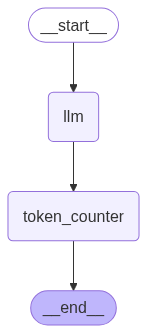

In [68]:
app2.get_graph().draw_mermaid_png()
display(Image(app2.get_graph().draw_mermaid_png()))
